In [1]:
from solver.jps import JPS
from solver.jpsplus import JPSPlus
from solver.astar import AStar
from solver.base import findPathBase
from solver.pruning.base import NoPruning
from solver.pruning.bbox import BBoxPruning

from utils.distance import diagonalDistance

from container.open import OpenList
from container.closed import ClosedList

from evaluation.test import simpleTest, massiveTest

from graph.node import Node
from graph.grid import GridMap

from utils.visualisation import drawResult

from evaluation.movingai import MovingAIDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
height = 15
width = 30
mapstr = '''

. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 7
jStart = 1
iGoal = 13
jGoal = 28
optLength = 35.38477631085024

In [3]:
startNode = Node(iStart, jStart)
goalNode = Node(iGoal, jGoal)
grid = GridMap().readFromString(mapstr, width, height)

In [2]:
movAI = MovingAIDataset('DragonAge/maps/arena2.map', 'DragonAge/tasks/arena2.map.scen' )
gridAI = GridMap().readFromString(movAI.grid, movAI.width, movAI.height)

## AStar BBoxPruning

### Simple test

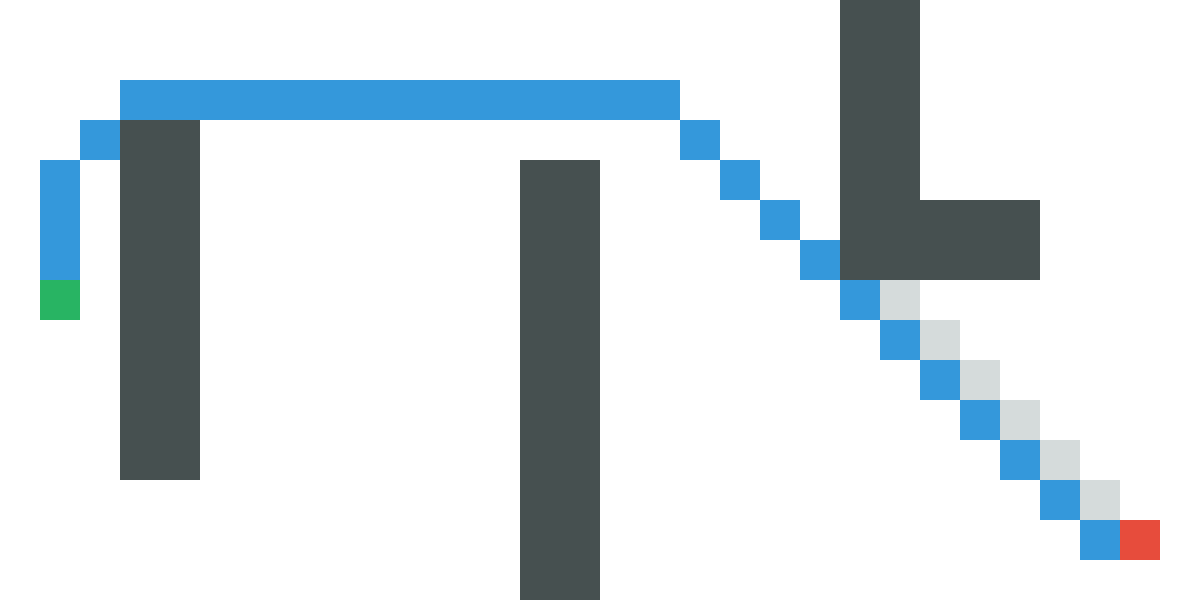

{'time': 0.0003886222839355469,
 'found': True,
 'length': 35.38477631085024,
 'created': 37}

In [37]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [38]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(gridAI)
AstarPruningStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 440/440 [00:00<00:00, 803.37it/s] 


## JPS BBoxPruning

### Simple test

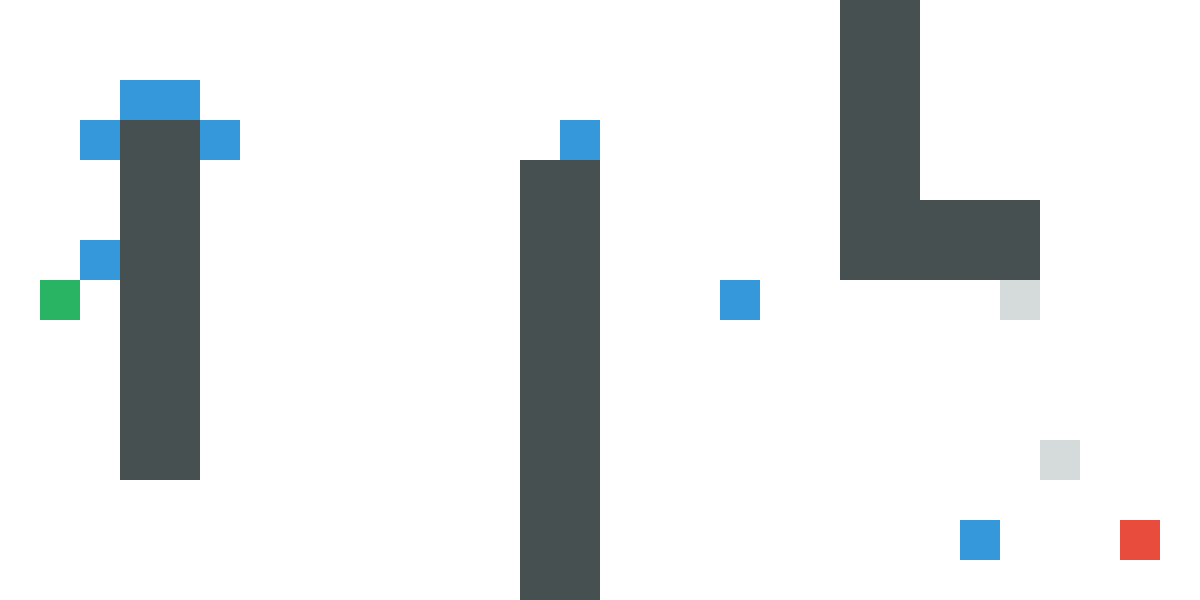

{'time': 0.0011377334594726562,
 'found': True,
 'length': 35.384776310850235,
 'created': 12}

In [39]:
prune = BBoxPruning()
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [40]:
prune = BBoxPruning()
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(gridAI)
JPSPruningStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 440/440 [00:07<00:00, 56.96it/s]


## JPSPlus BBoxPruning

### Simple test

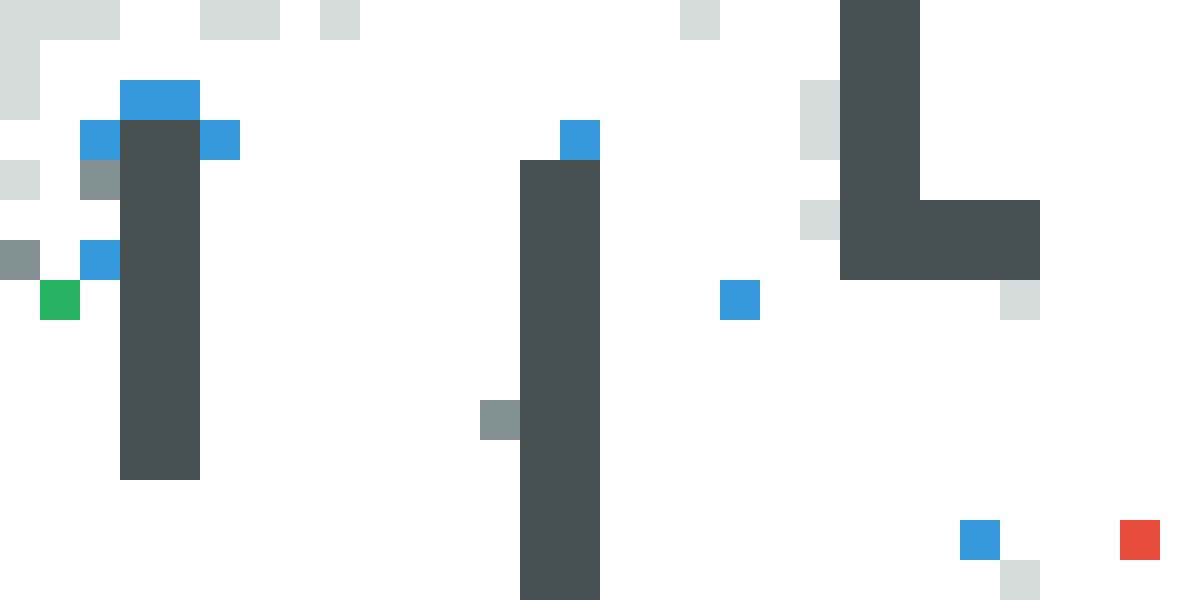

{'time': 0.00021219253540039062,
 'found': True,
 'length': 35.384776310850235,
 'created': 28}

In [41]:
prune = BBoxPruning()
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [42]:
prune = BBoxPruning()
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(gridAI)
JPSPlusPruningStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 440/440 [00:00<00:00, 1808.36it/s]


## Astar

### Simple test

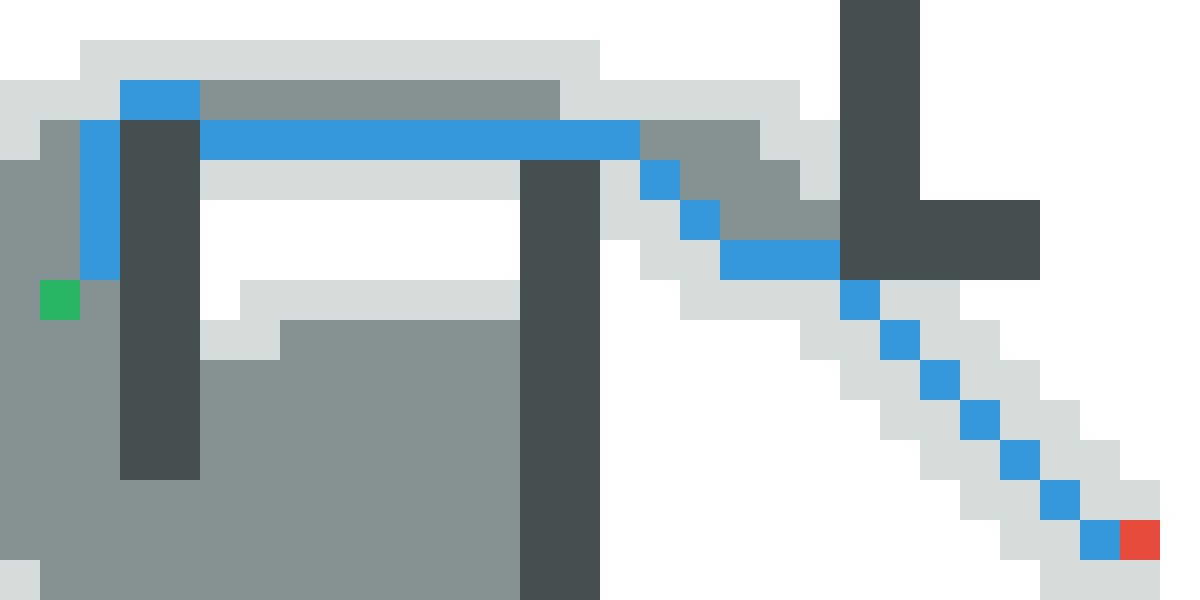

{'time': 0.0032389163970947266,
 'found': True,
 'length': 35.384776310850235,
 'created': 218}

In [43]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [3]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
solver.doPreprocess(gridAI)
AstarStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 910/910 [02:10<00:00,  6.95it/s]


## JPS

### Simple test

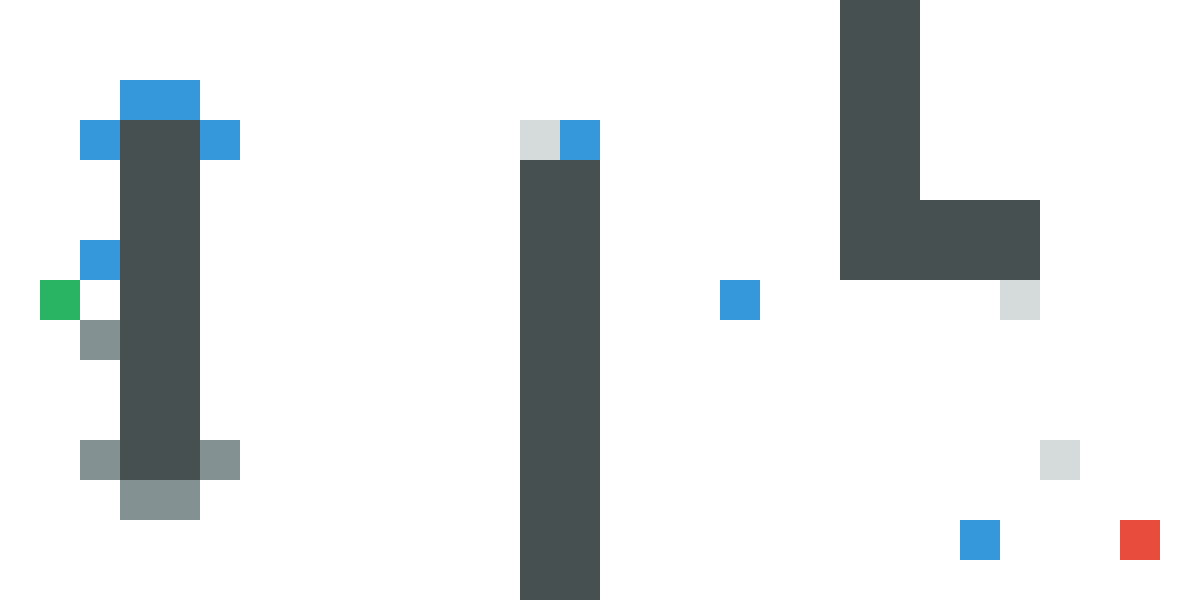

{'time': 0.0049304962158203125,
 'found': True,
 'length': 35.384776310850235,
 'created': 18}

In [45]:
prune = NoPruning()
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [4]:
prune = NoPruning()
solver = JPS(diagonalDistance, prune)
solver.doPreprocess(gridAI)
JPSStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 910/910 [17:21<00:00,  1.14s/it]


## JPSPlus

### Simple test

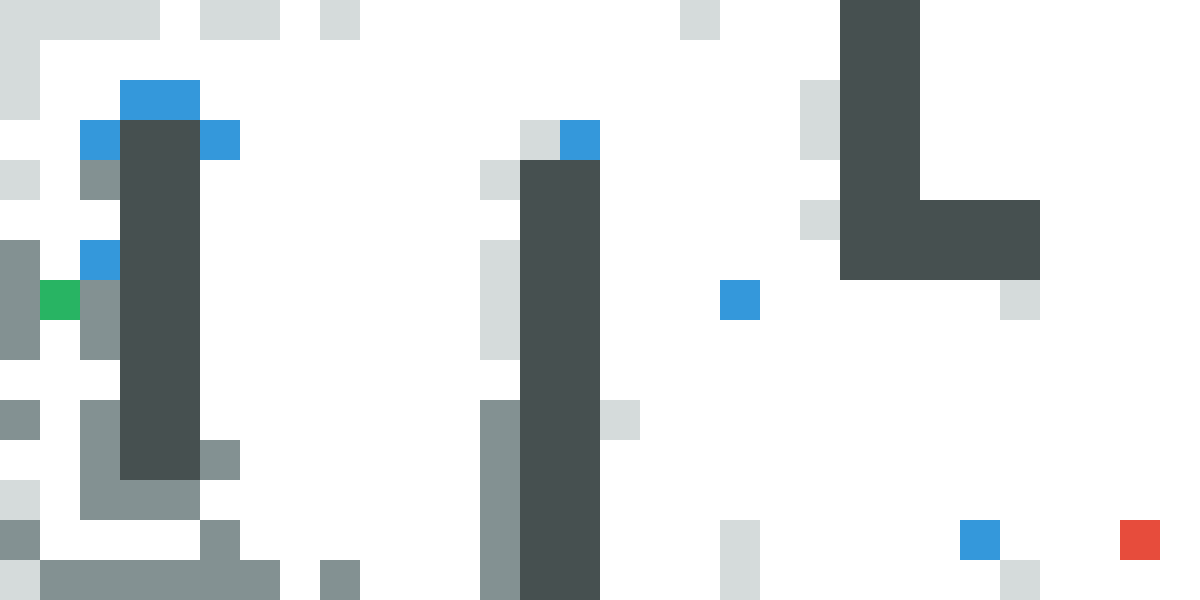

{'time': 0.0005359649658203125,
 'found': True,
 'length': 35.384776310850235,
 'created': 63}

In [47]:
prune = NoPruning()
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(grid)
simpleTest(solver, findPathBase, grid, startNode, goalNode, optLength, OpenList, ClosedList)

### Massive test

In [5]:
prune = NoPruning()
solver = JPSPlus(diagonalDistance, prune)
solver.doPreprocess(gridAI)
JPSPlusStat = massiveTest(solver, movAI.tasks, gridAI, diagonalDistance)

100%|██████████| 910/910 [00:20<00:00, 43.90it/s]


## Analysis

## rmtst.map

In [126]:
print('AStar:', np.sum(AstarStat['time']))
print('AStar Prunning:', np.sum(AstarPruningStat['time']))
print('JPS:', np.sum(JPSStat['time']))
print('JPS Prunning:', np.sum(JPSPruningStat['time']))
print('JPS+', np.sum(JPSPlusStat['time']))
print('JPS+ Pruning:', np.sum(JPSPlusPruningStat['time']))

AStar: 5.552648305892944
AStar Prunning: 0.538038969039917
JPS: 2.9699732661247253
JPS Prunning: 0.7694806098937989
JPS+ 0.34067296981811523
JPS+ Pruning: 0.23812103271484375


In [123]:
timeStat =  np.array([AstarStat['time'], JPSStat['time'], JPSPlusStat['time'], AstarPruningStat['time'], JPSPruningStat['time'], JPSPlusPruningStat['time'] ])

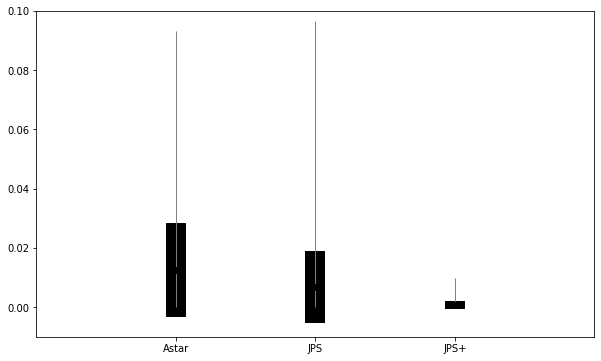

In [184]:
mins = timeStat.min(1)
maxes = timeStat.max(1)
means = timeStat.mean(1)
std = timeStat.std(1)
plt.figure(figsize=(10,6))

plt.errorbar(np.arange(3), means[:3], std[:3], fmt='ok', lw=20 )

plt.errorbar(['Astar', 'JPS',  'JPS+'], means[:3], [(means - mins)[:3], (maxes - means)[:3]],
             fmt='.k', ecolor='gray', lw=1)
plt.xlim(-1, 3)
plt.ylim(-0.01, 0.1)
plt.title = 'scores'
plt.savefig('1Time1.jpg')
plt.show()

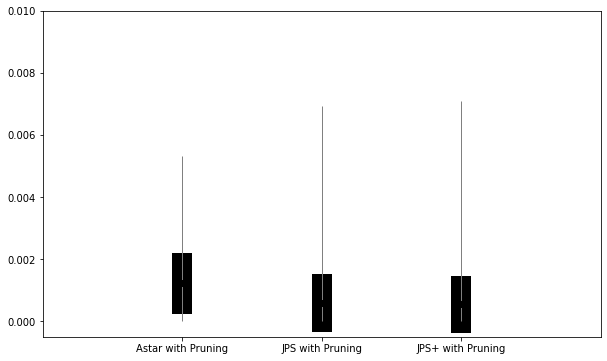

In [185]:
plt.figure(figsize=(10,6))

plt.errorbar(np.arange(3), means[3:], std[3:], fmt='ok', lw=20)
plt.errorbar(['Astar with Pruning', 'JPS with Pruning',  'JPS+ with Pruning'], means[3:], [(means - mins)[3:], (maxes - means)[3:]],
             fmt='.k', ecolor='gray', lw=1)
plt.xlim(-1, 3)
plt.ylim(-0.0005, 0.01)
plt.savefig('1Time2.jpg')
plt.show()

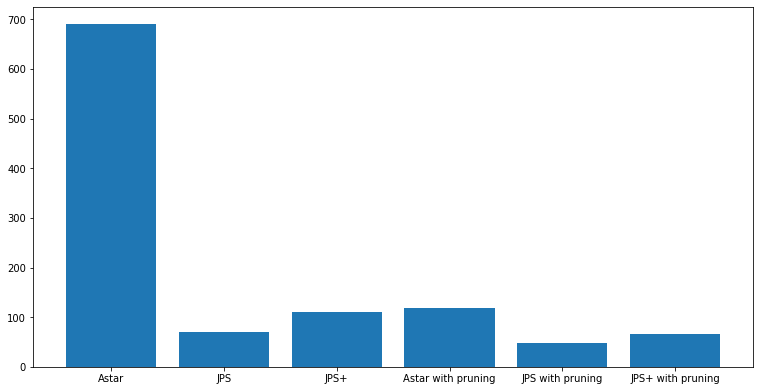

<Figure size 432x288 with 0 Axes>

In [188]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
alg = ['Astar', 'JPS', 'JPS+', 'Astar with pruning', 'JPS with pruning', 'JPS+ with pruning']
lens = [np.mean(AstarStat['created']), np.mean(JPSStat['created']), np.mean(JPSPlusStat['created']), np.mean(AstarPruningStat['created']), np.mean(JPSPruningStat['created']), np.mean(JPSPlusPruningStat['created'])]
ax.bar(alg, lens)
plt.show()
plt.savefig('1NodesCreated.jpg')
plt.show()

## arena.map

In [7]:
print('AStar:', np.sum(AstarStat['time']))
print('JPS:', np.sum(JPSStat['time']) /  9)
print('JPS+', np.sum(JPSPlusStat['time']))

AStar: 129.9298369884491
JPS: 115.67945313453674
JPS+ 20.51542639732361


In [11]:
timeStat =  np.array([AstarStat['time'], np.array(JPSStat['time']) / 9, JPSPlusStat['time'] ])
mins = timeStat.min(1)
maxes = timeStat.max(1)
means = timeStat.mean(1)
std = timeStat.std(1)

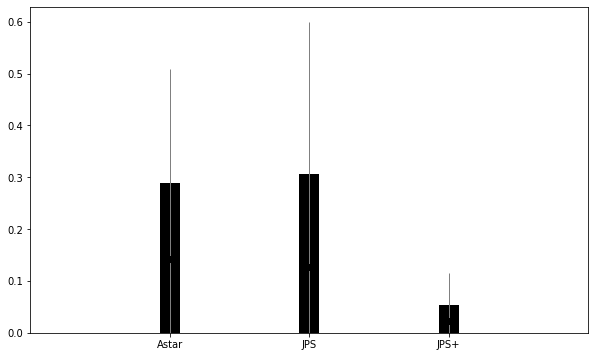

In [12]:
plt.figure(figsize=(10,6))

plt.errorbar(np.arange(3), means, std, fmt='ok', lw=20)
plt.errorbar(['Astar', 'JPS',  'JPS+'], means, [(means - mins), (maxes - means)],
             fmt='.k', ecolor='gray', lw=1)
plt.xlim(-1, 3)
plt.ylim(-0.0005)
plt.savefig('2Time1.jpg')
plt.show()